In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import shutil 
import glob
import keras
import warnings
warnings.filterwarnings('ignore')

In [2]:
ROOT_DIR = "BrainTumorData/a_images"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('no', 881), ('yes', 1085)])

## Model Build

In [3]:
# 80% train
# 10% test
# 10% validation
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
import keras

## CNN Model

In [4]:
model = Sequential()
model.add(Conv2D(filters= 16 , kernel_size= (3,3), activation= 'relu', input_shape=(224,224,3)))
model.add(Conv2D(filters= 32 , kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters= 64 , kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters= 128 , kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=64 , activation= 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units=1 , activation= 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [5]:
model.compile(optimizer='adam', loss = keras.losses.binary_crossentropy, metrics=['accuracy'] )

## Prepare data

In [6]:
def image_preprocessing1(path):
    image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/225, horizontal_flip=True) #Data Augmentation
    image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size=32, class_mode='binary')
    return image

In [7]:
path = "BrainTumorData/train"
train_data = image_preprocessing1(path)

Found 1573 images belonging to 2 classes.


In [8]:
def image_preprocessing2(path):
    image_data = ImageDataGenerator(rescale=1/225)
    image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size=32, class_mode='binary')
    return image

In [9]:
path = "BrainTumorData/test"
test_data = image_preprocessing2(path)

Found 198 images belonging to 2 classes.


In [10]:
path = "BrainTumorData/val"
val_data = image_preprocessing2(path)

Found 196 images belonging to 2 classes.


In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping 

In [12]:
es = EarlyStopping(monitor='accuracy', min_delta = 0.01, patience=10, verbose=1, mode = 'auto',restore_best_weights = True)

mc = ModelCheckpoint(monitor='accuracy',filepath='.desiredmodel.h5',verbose = 1,save_best_only=True, mode='auto')
cd = [es,mc]

## Model Training

In [13]:
hs = model.fit_generator(generator= train_data, steps_per_epoch=8 , epochs=20,verbose=1,validation_data=val_data, validation_steps=16, callbacks=cd)

Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.7788 - accuracy: 0.4961WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 16 batches). You may need to use the repeat() function when building your dataset.

Epoch 1: accuracy improved from -inf to 0.49609, saving model to .desiredmodel.h5
8/8 [==============================] - 13s 1s/step - loss: 0.7788 - accuracy: 0.4961 - val_loss: 0.6741 - val_accuracy: 0.7347
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.6756 - accuracy: 0.5703
Epoch 2: accuracy improved from 0.49609 to 0.57031, saving model to .desiredmodel.h5
8/8 [==============================] - 9s 1s/step - loss: 0.6756 - accuracy: 0.5703
Epoch 3/20
8/8 [==============================] - ETA: 0s - loss: 0.6550 - accuracy: 0.5983
Epoch 3: accuracy improved from 0.57031 to 0.59825, saving model to .desiredmode

In [14]:
h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

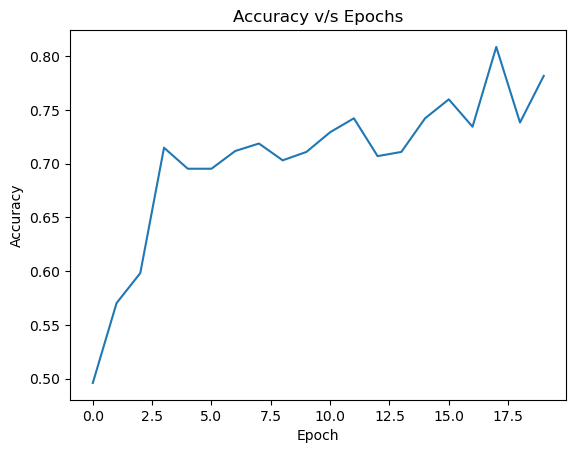

In [15]:
plt.plot(h['accuracy'])
plt.title("Accuracy v/s Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

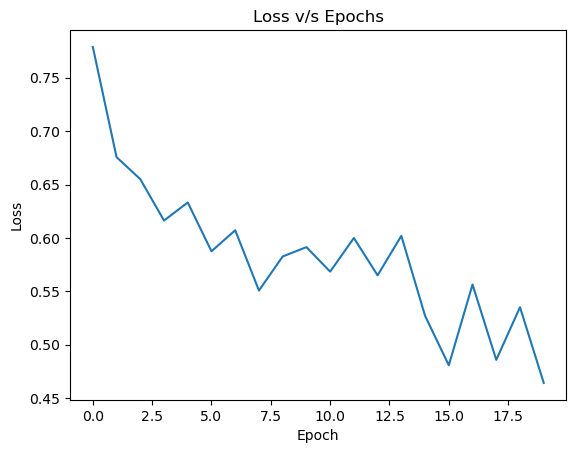

In [16]:
plt.plot(h['loss'])
plt.title("Loss v/s Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [17]:
acc = model.evaluate_generator(test_data)[1]
print(acc)

0.7373737096786499


In [18]:
from keras_preprocessing.image import load_img,img_to_array

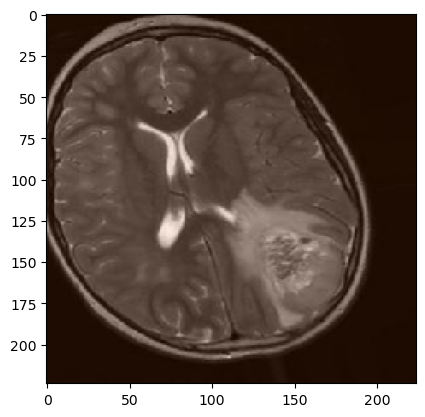

1/1 [==============================] - 2s 2s/step
No Brain Tumor detected


In [19]:
path = "BrainTumorData/a_images/yes/aug_Y100_0_1840.jpg"

img = load_img(path, target_size= (224,224))
input_arr = img_to_array(img)/255

input_arr.shape


plt.imshow(input_arr)
plt.show()
input_arr = np.expand_dims(input_arr,0)
pred = model.predict(input_arr)
# print(pred)
if pred[0]<0.5:
    print("No Brain Tumor detected")
else:
    print("Brain Tumor detected")

In [20]:
train_data.class_indices 

{'no': 0, 'yes': 1}